In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
#Import csv and find datat types of the  Categories
titanic_df=pd.read_csv("Titanic.csv");
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Check the completness of the data ///// if all the feilds are filled
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Taking into Consideration the below Categories

1.   Age
2.   Sex
3.   Passenger Class

Analysing the survival factor

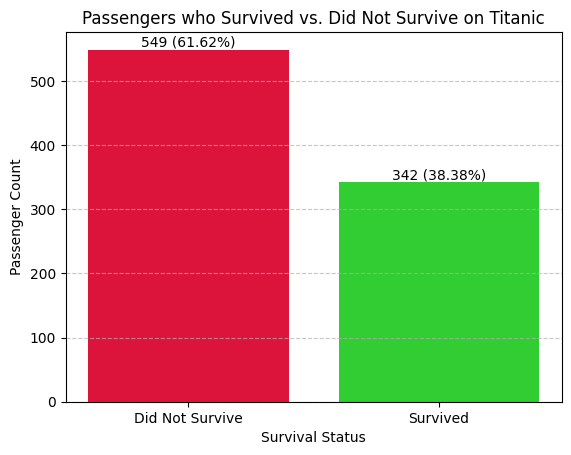

In [ ]:
# Calculate the total number of passengers
total_passengers = len(titanic_df)

# Group the data by survival status and calculate the count of passengers for each status
survived_counts = titanic_df['Survived'].value_counts()

# Calculate the percentage of passengers for each survival status relative to the total
survived_percent_relative = survived_counts / total_passengers * 100

# Create the bar chart with custom colors
colors = ['crimson', 'limegreen']
plt.bar(survived_counts.index, survived_counts.values, color=colors)

# Add labels and title
plt.xlabel('Survival Status')
plt.ylabel('Passenger Count')
plt.title('Passengers who Survived vs. Did Not Survive on Titanic')

# Add text annotations for count and percentage relative to total on top of each bar
for index, value in enumerate(survived_counts.values):
    percentage_relative_text = f"{value} ({survived_percent_relative[index]:.2f}%)"
    plt.text(index, value, percentage_relative_text, ha='center', va='bottom', fontsize=10, color='black')

# Customize x-axis tick labels
plt.xticks(survived_counts.index, ['Did Not Survive', 'Survived'])

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

This Data Indicates a Huge number of the Passengers didnt survive  the accident

#Women and Children were evacuated to the life boats first so the chance of females surviving is higher than that of males

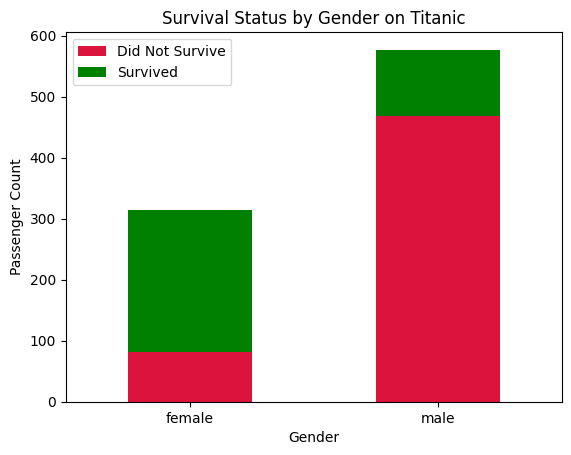

In [ ]:


# Group data by 'Sex' and 'Survived' columns and count occurrences
survival_counts = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

# Create a stacked bar chart using matplotlib
survival_counts.plot(kind='bar', stacked=True, color=['crimson', 'green'])
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.title('Survival Status by Gender on Titanic')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'], loc='upper left')
plt.show()

#The Passengers of Better Class Tickets would have gotten more preference over the others during the Evacuation Process thus comparing PClass for the Survival rate

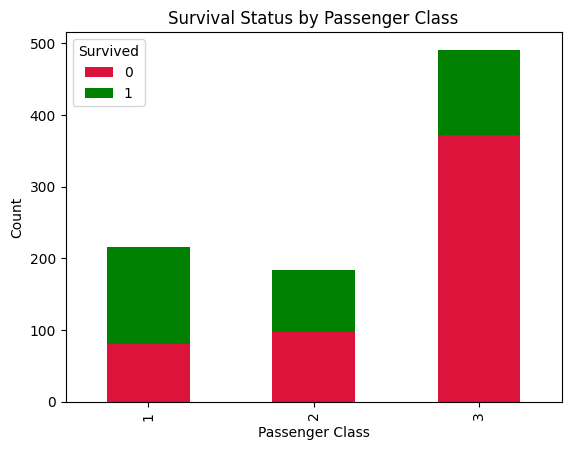

In [ ]:
# Group the data by passenger class and survival status, and calculate the count of passengers in each category
survival_counts = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

# Create the stacked bar plot
survival_counts.plot(kind='bar', stacked=True, color=['crimson', 'green'])

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Status by Passenger Class')

# Show the plot
plt.show()

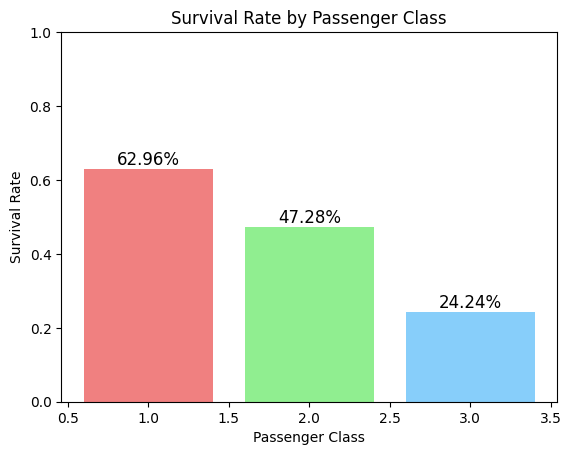

In [ ]:
# Group the data by passenger class and calculate the survival rate (mean of "Survived" column) for each class
survival_rates = titanic_df.groupby('Pclass')['Survived'].mean()

colors = ['lightcoral', 'lightgreen', 'lightskyblue']

# Create the bar plot for survival rates
plt.bar(survival_rates.index, survival_rates.values, color=colors)

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')

# Add survival rate values on top of each bar
for i in survival_rates.index:
    plt.text(i, survival_rates[i], f'{survival_rates[i]*100:.2f}%', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.ylim(0, 1)  # Set the y-axis limit to show survival rate as percentage (0% to 100%)
plt.show()

#From the Data we can conclude that the passengers of better ticket class had a better rate of survival compared to the other 2 classes

#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#As mentioned above Women and children were evacuated frst , Analysing based on age will give a insight into how the age of passengers

Data of age has empty fields, so take care of that before proceeding



*   Remove Empty rows : 177 fields are there loosing these many entries almost 20% of the entries this can effect the analysis
*   Applying mean : Apply mean age to missing fields



In [14]:
#create a new df to preserve the orginal data
titanic_df_cleaned=titanic_df

In [15]:
print('Oldest person Survived was of:',titanic_df_cleaned['Age'].max())
print('Youngest person Survived was of:',titanic_df_cleaned['Age'].min())
print('Average person Survived was of:',titanic_df_cleaned['Age'].mean())
# Calculate the mode of the 'Age' column
age_mode = titanic_df_cleaned['Age'].mode().values[0]

# Calculate the median of the 'Age' column
age_median = titanic_df_cleaned['Age'].median()

# Print the mode and median
print('Mode of Age:', age_mode)
print('Median of Age:', age_median)

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882
Mode of Age: 24.0
Median of Age: 28.0


#since there is slight variation between 3 values apply median to empty fields

In [16]:
titanic_df_cleaned['Age'].fillna(age_median, inplace=True)
titanic_df_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

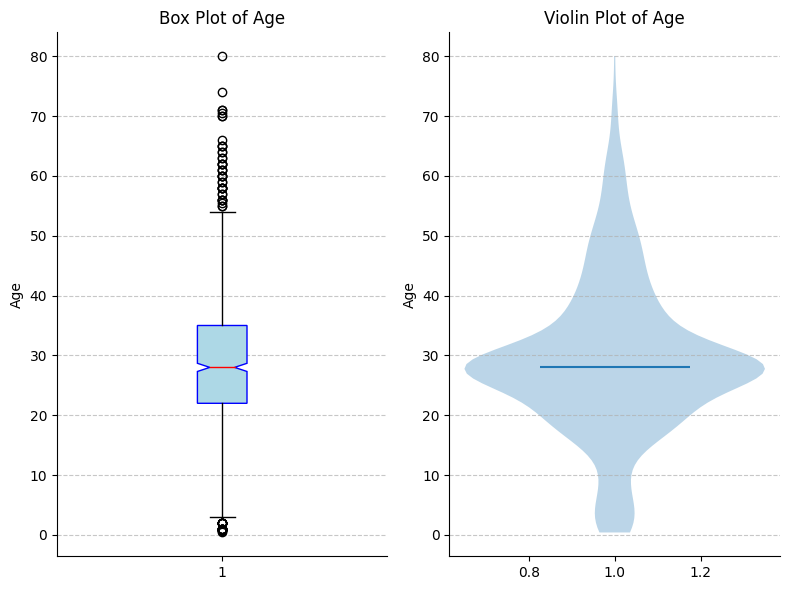

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size (optional)

# Creating the vertical box plot for the 'Age' column
plt.subplot(1, 2, 1)
plt.boxplot(titanic_df_cleaned['Age'], vert=True, notch=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
plt.ylabel('Age')
plt.title('Box Plot of Age')

# Creating the vertical violin plot for the 'Age' column
plt.subplot(1, 2, 2)
plt.violinplot(titanic_df_cleaned['Age'], vert=True, showmedians=True, widths=0.7, showextrema=False)
plt.ylabel('Age')
plt.title('Violin Plot of Age')

# Removing the top and right spines for both subplots
for ax in plt.gcf().axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adding grid lines for both subplots
plt.subplot(1, 2, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjusts the spacing between subplots for better appearance

plt.show()

#Age is now cleaned now we can compare how age effected survivablity


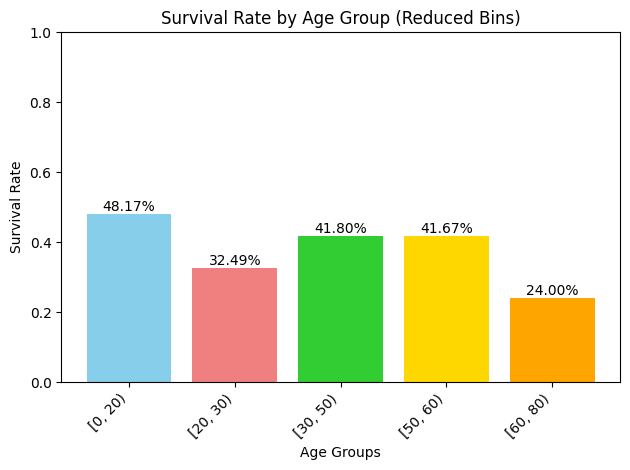

In [ ]:
age_bins = [0, 20, 30,  50, 60, 80]

# Grouping data by age intervals and calculating the survival rate for each interval
titanic_df_cleaned['AgeCategory'] = pd.cut(titanic_df_cleaned['Age'], bins=age_bins, right=False)
survival_rate_by_age_group = titanic_df_cleaned.groupby('AgeCategory')['Survived'].mean()

# Define custom colors for the bars
colors = ['skyblue', 'lightcoral', 'limegreen', 'gold', 'orange']

# Create the bar plot for survival rate by age group with custom colors
plt.bar(survival_rate_by_age_group.index.astype(str), survival_rate_by_age_group.values, color=colors)

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group (Reduced Bins)')

# Add survival rate values on top of each bar
for i, rate in enumerate(survival_rate_by_age_group):
    plt.text(i, rate, f'{rate*100:.2f}%', ha='center', va='bottom')

# Show the plot
plt.ylim(0, 1)  # Set the y-axis limit to show survival rate as percentage (0% to 100%)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

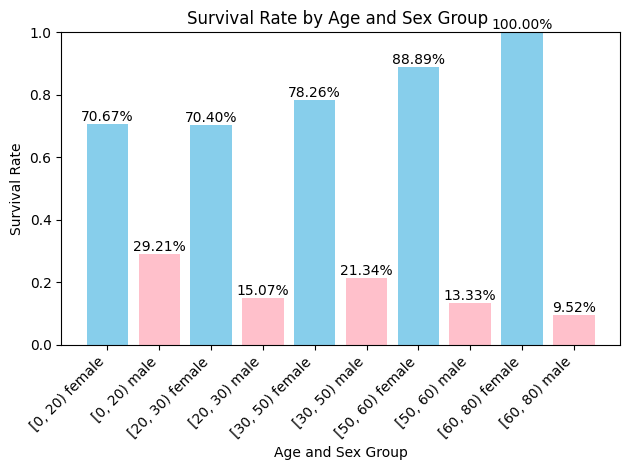

In [ ]:
age_bins = [0, 20, 30,  50, 60, 80]

# Grouping data by age intervals and calculating the survival rate for each interval
titanic_df_cleaned['AgeCategory'] = pd.cut(titanic_df_cleaned['Age'], bins=age_bins, right=False)
survival_rate_by_age_sex_group = titanic_df_cleaned.groupby(['AgeCategory', 'Sex'])['Survived'].mean()

# Define custom colors for the bars (Male: blue, Female: pink)
colors = ['skyblue', 'pink']

# Create the bar plot for survival rate by age and sex group with custom colors
age_sex_labels = ['{} {}'.format(age, sex) for age in survival_rate_by_age_sex_group.index.levels[0] for sex in survival_rate_by_age_sex_group.index.levels[1]]
plt.bar(age_sex_labels, survival_rate_by_age_sex_group.values, color=colors)

# Add labels and title
plt.xlabel('Age and Sex Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age and Sex Group ')

# Add survival rate values on top of each bar
for i, rate in enumerate(survival_rate_by_age_sex_group):
    plt.text(i, rate, f'{rate*100:.2f}%', ha='center', va='bottom')

# Show the plot
plt.ylim(0, 1)  # Set the y-axis limit to show survival rate as percentage (0% to 100%)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


#Analysing the Age of the Passengers its observed


1.   When Taking only age into consideration we cant observe a huge difference in the survival rate , but underage passengers were given more preferences during the evacuation process
2.   When taking the age and Sex into consideration its observed that men of able age of catgory 20-30 had the lowest chance of survival provided they helped the most during the evacuaton process
3.   Its also Observed that almost all the elderly women passengers had a greater chance of survivality compared to other categories







#Taking all the 3 categories in consideration


*   AGE
*   SEX
*   Passenger Class



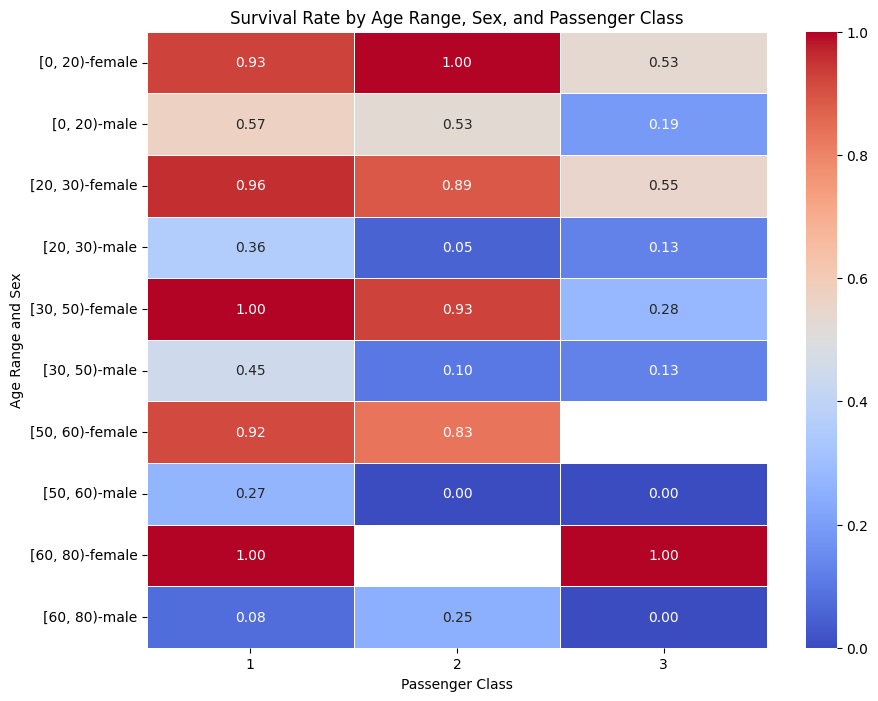

In [ ]:
# Calculate the average survival rate for each combination of age, sex, and passenger class

import seaborn as sns


# Define age intervals for grouping
age_bins = [0, 20, 30,  50, 60, 80]

# Create a new column "AgeRange" containing the age group for each passenger
titanic_df_cleaned['AgeRange'] = pd.cut(titanic_df_cleaned['Age'], bins=age_bins, right=False)

# Calculate the average survival rate for each combination of age range, sex, and passenger class
survival_rate_by_group = titanic_df_cleaned.groupby(['AgeRange', 'Sex', 'Pclass'])['Survived'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap using crosstab
heatmap_data = pd.crosstab(index=[survival_rate_by_group['AgeRange'], survival_rate_by_group['Sex']],
                           columns=survival_rate_by_group['Pclass'],
                           values=survival_rate_by_group['Survived'], aggfunc='mean')

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Age Range and Sex')
plt.title('Survival Rate by Age Range, Sex, and Passenger Class')

plt.show()

#Observations



*   Higher Survival Rates Among Females
*   Survival Advantage for 1st Class Females
*   Better Survival Chances for Children
*   Lower Survival Rates for Males 20-50 age range
*   Less Impact of Passenger Class on Survival for Males




Function to Draw heatmap based on passed categories

In [ ]:
def draw_heatmap_3categories(data, x_category, y_category, hue_category, figsize=(10, 8), cmap='coolwarm', annot=True):
    """
    Draw a heatmap based on three specified categories.

    Parameters:
        data (DataFrame): The dataset containing the relevant data.
        x_category (str): The column name for the x-axis category.
        y_category (str): The column name for the y-axis category.
        hue_category (str): The column name for the hue (color) category.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (10, 8).
        cmap (str, optional): Colormap for the heatmap. Default is 'coolwarm'.
        annot (bool, optional): Whether to display annotations (data values) on the heatmap. Default is True.
    """
    # Pivot the data to create a matrix for the heatmap
    heatmap_data = pd.pivot_table(data, index=y_category, columns=x_category, values=hue_category, aggfunc='mean')

    # Create the heatmap using Seaborn
    plt.figure(figsize=figsize)
    sns.heatmap(heatmap_data, cmap=cmap, annot=annot, fmt=".2f", linewidths=0.5)

    # Add labels and title
    plt.xlabel(x_category.capitalize())
    plt.ylabel(y_category.capitalize())
    plt.title(f'Heatmap: {hue_category.capitalize()} by {x_category.capitalize()} and {y_category.capitalize()}')

    plt.show()

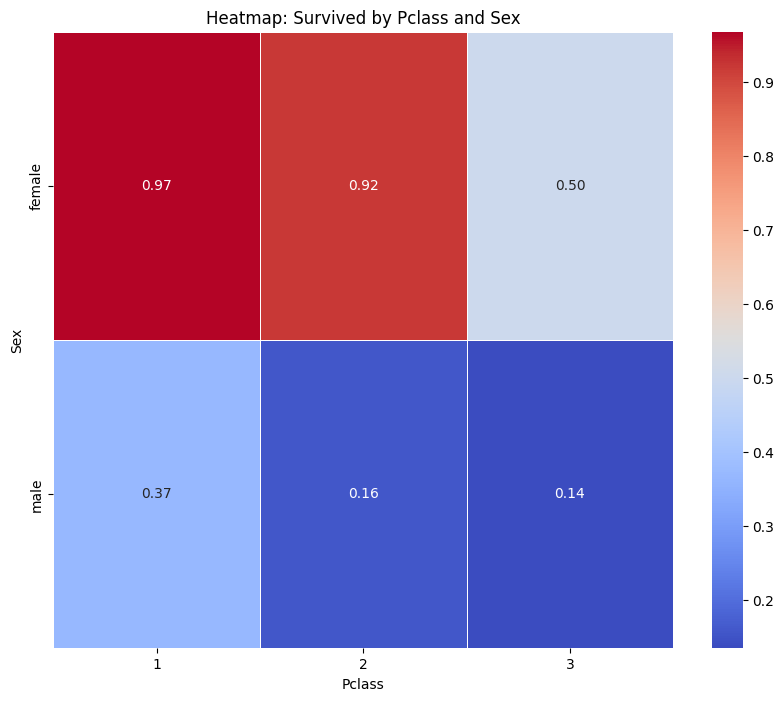

In [ ]:
#Pclass,Sex
draw_heatmap_3categories(data=titanic_df_cleaned, x_category='Pclass', y_category='Sex', hue_category='Survived')

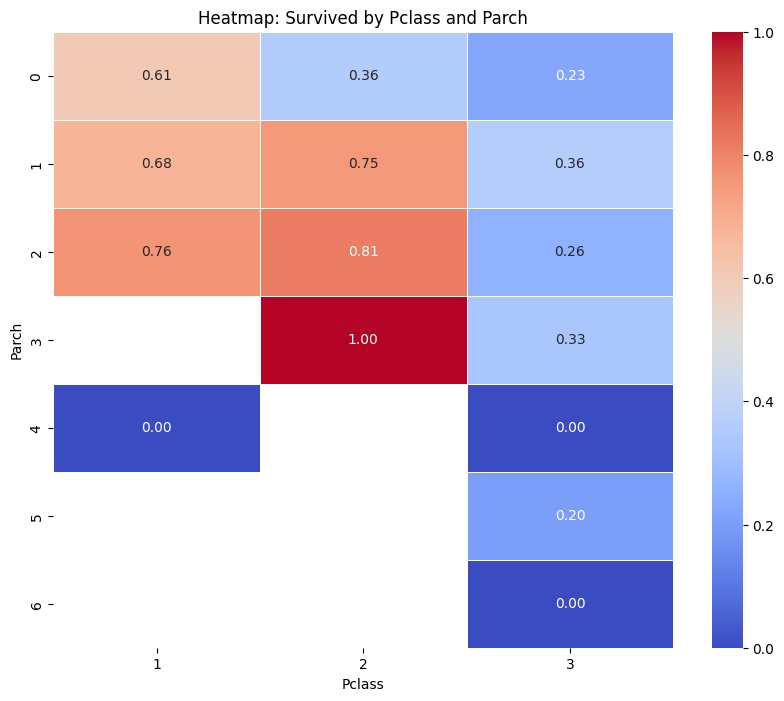

In [ ]:
#Pclass,SibSp
draw_heatmap_3categories(data=titanic_df_cleaned, x_category='Pclass', y_category='Parch', hue_category='Survived')

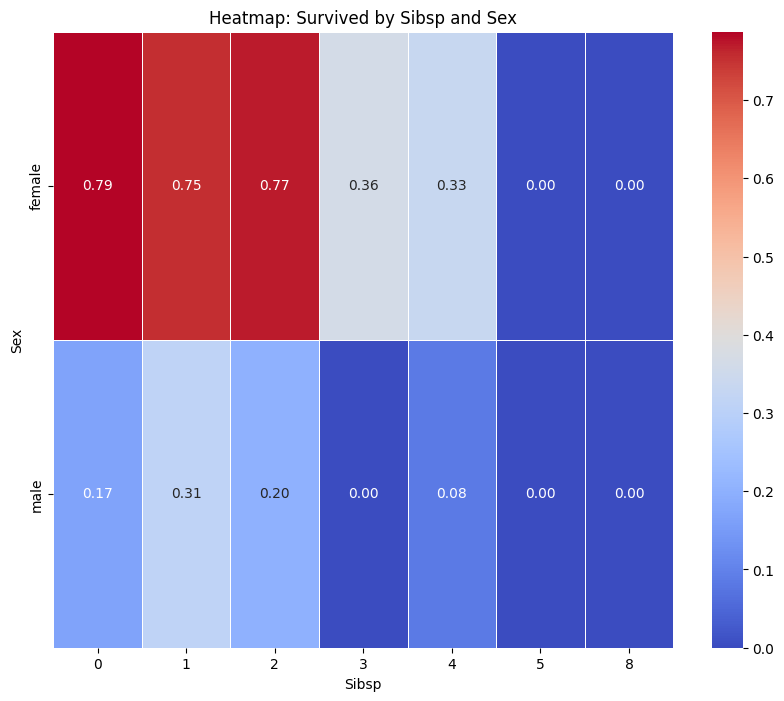

In [ ]:
#Pclass,SibSp
draw_heatmap_3categories(data=titanic_df_cleaned, x_category='SibSp', y_category='Sex', hue_category='Survived')

In [ ]:
def jitter_plot(data, x_category, y_category, figsize=(8, 6)):
    """
    Create a scatter plot between two categorical variables using a jitter plot.

    Parameters:
        data (DataFrame): The dataset containing the relevant data.
        x_category (str): The column name for the x-axis category.
        y_category (str): The column name for the y-axis category.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (8, 6).
    """
    # Group the data by the categorical columns
    grouped_data = data.groupby([x_category, y_category]).size().reset_index(name='count')

    # Jitter the x-axis values
    jitter_x = grouped_data[x_category] + np.random.uniform(-0.2, 0.2, len(grouped_data))

    # Get unique y-axis values
    y_values = np.unique(grouped_data[y_category])

    # Create the jitter plot
    plt.figure(figsize=figsize)
    for i, y_val in enumerate(y_values):
        jitter_y = grouped_data[grouped_data[y_category] == y_val]['count'] + np.random.uniform(-0.2, 0.2, len(grouped_data[grouped_data[y_category] == y_val]))
        plt.scatter(jitter_x[grouped_data[y_category] == y_val], jitter_y, alpha=0.5, label=y_val)

    plt.xlabel(x_category.capitalize())
    plt.ylabel('Count')
    plt.title(f'Scatter Plot: {x_category.capitalize()} vs. Count using Jitter Plot')
    plt.legend()
    plt.show()

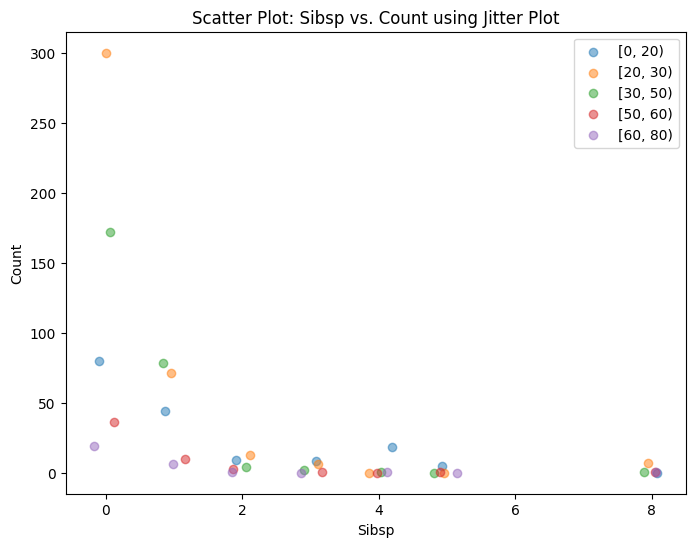

In [ ]:
jitter_plot(data=titanic_df_cleaned, x_category='SibSp', y_category='AgeRange')

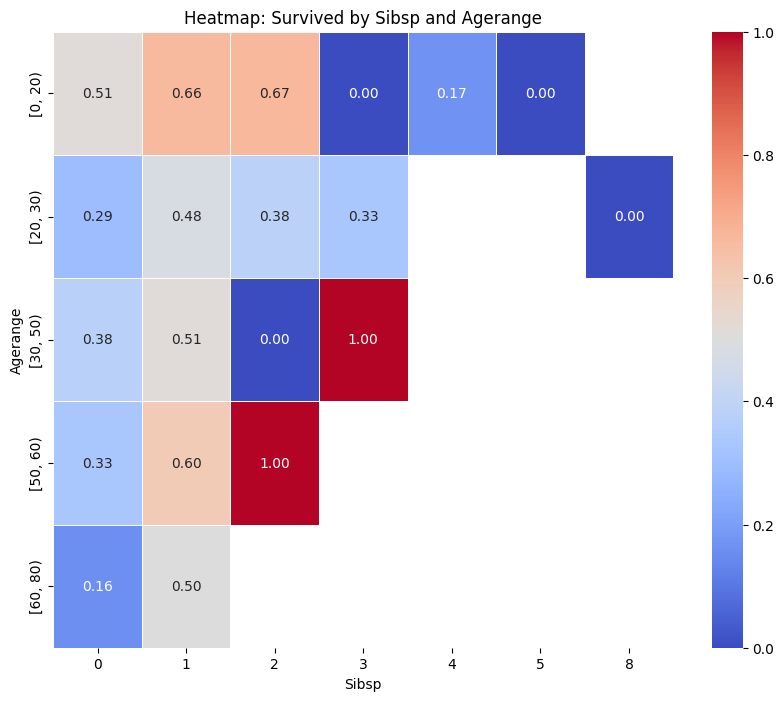

In [ ]:
draw_heatmap_3categories(data=titanic_df_cleaned, x_category='SibSp', y_category='AgeRange', hue_category='Survived')

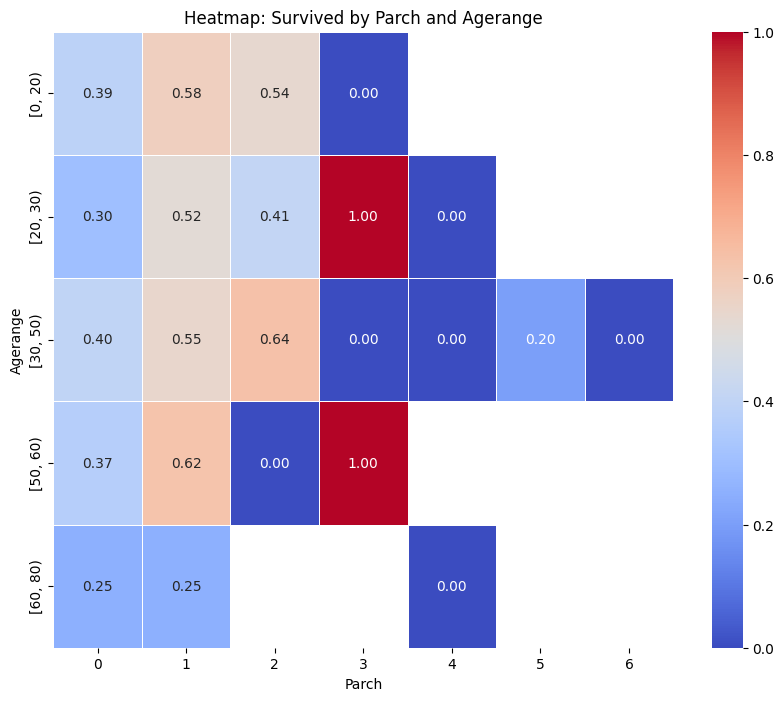

In [ ]:
draw_heatmap_3categories(data=titanic_df_cleaned, x_category='Parch', y_category='AgeRange', hue_category='Survived')

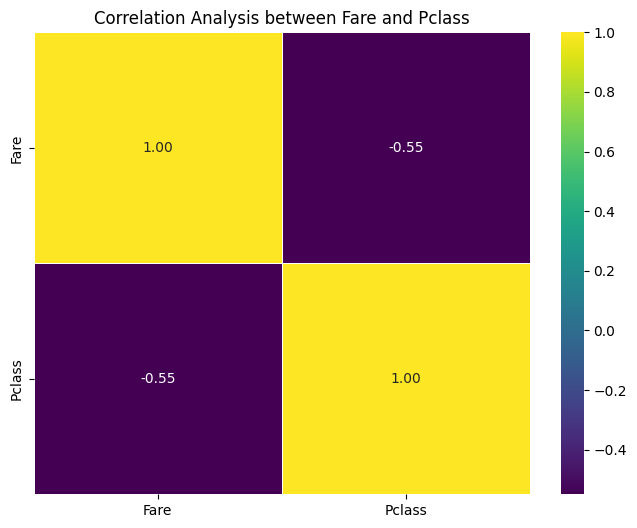

In [18]:
numeric_columns = titanic_df_cleaned.select_dtypes(include=[float, int]).columns

# Select only "Fare" and "Pclass" columns
fare_class_df = titanic_df_cleaned[["Fare", "Pclass"]]

# Calculate the correlation matrix
correlation_matrix = fare_class_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Analysis between Fare and Pclass')
plt.show()



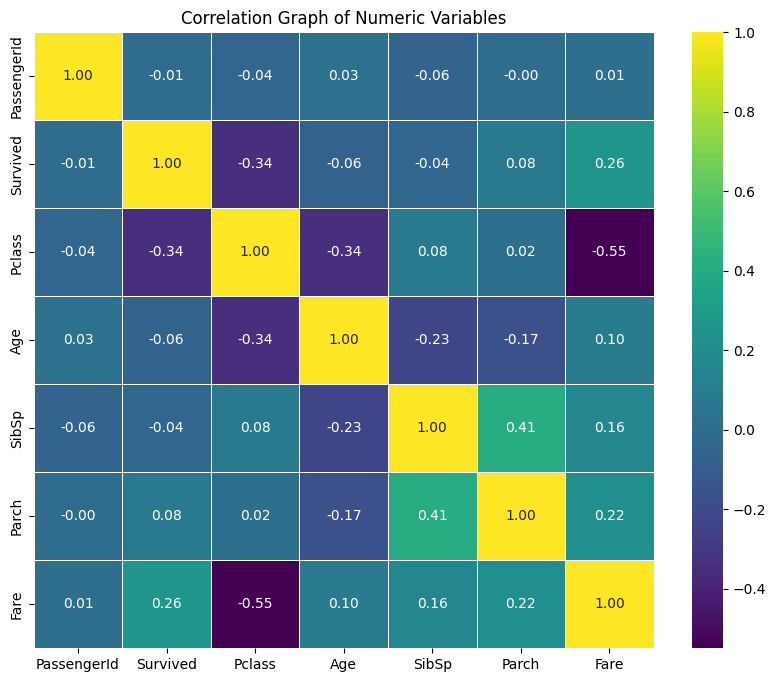

In [20]:
numeric_columns = titanic_df.select_dtypes(include=[float, int]).columns

# Create a subset of the DataFrame with only numeric columns
numeric_df = titanic_df[numeric_columns]

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation graph
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Graph of Numeric Variables')
plt.show()

The EDA of the Titanic dataset revealed important insights about passenger survival. Approximately 38% of passengers survived the disaster. Gender played a crucial role, with women having a higher survival rate than men, likely due to the "women and children first" policy. Passenger class also influenced survival, as 1st class passengers had a better chance of survival compared to lower classes.

Age was a determining factor, with children and young adults (age 0-17) having a higher survival rate. The correlation analysis showed moderate correlations between fare and class, as well as fare and survival.